# Insurance Prediction                     
                                                  Project:- Love Fadia

# Importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
Data = pd.read_csv("insurance.csv")

In [3]:
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [4]:
Data.describe()

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


In [5]:
Data.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

# Data Visualization and Cleaning

<AxesSubplot:title={'center':'Missing Values'}>

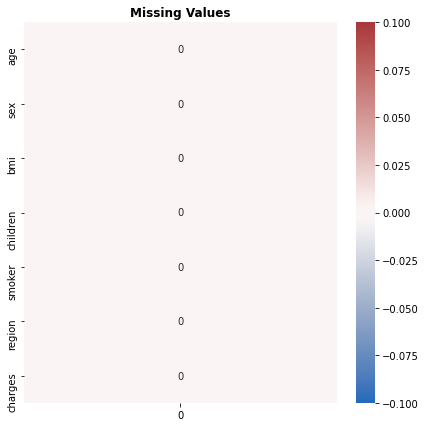

In [6]:
plt.figure(figsize=(7,7))
plt.title("Missing Values", fontweight="bold")

sns.heatmap(data=Data.isna().sum().to_frame(),annot= True,fmt="d", cmap="vlag")

### There are no missing values

<AxesSubplot:>

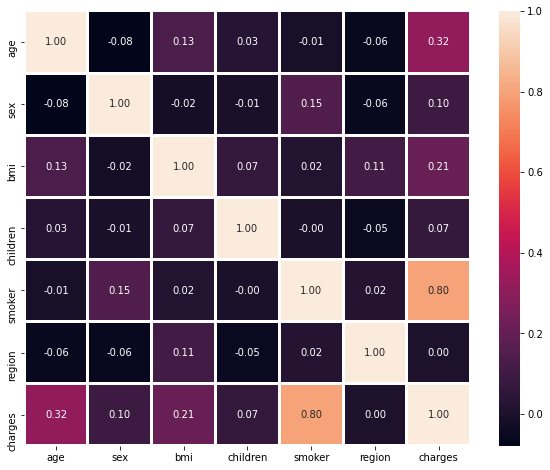

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(data= Data.corr(),annot= True, fmt=".2f", linewidths=2)

### Smoker feature has the highest corelation and region has the lowest corelation

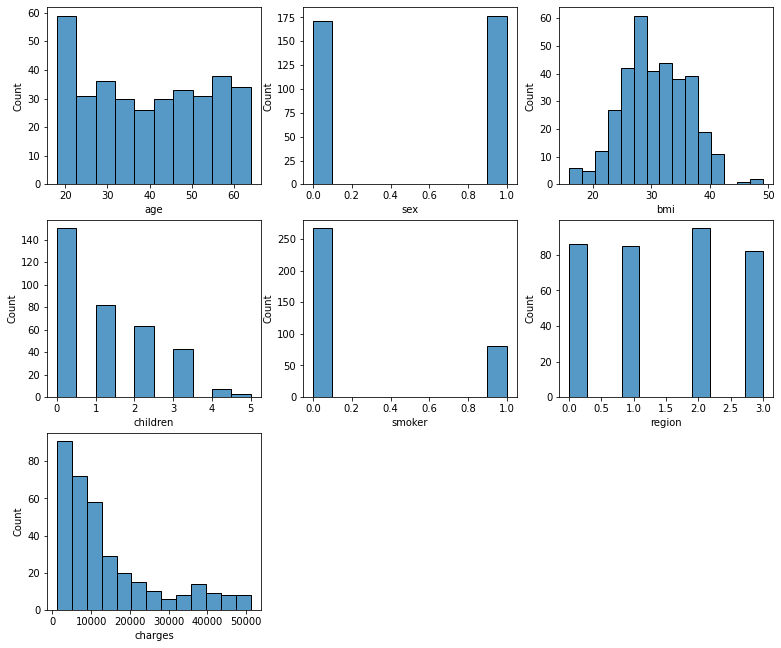

In [8]:
i =1
plt.figure(figsize=(13,15))
for col in Data.columns:
    plt.subplot(4,3,i)
    sns.histplot(Data[col])
    i+=1


In [9]:
Data.drop_duplicates(inplace=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

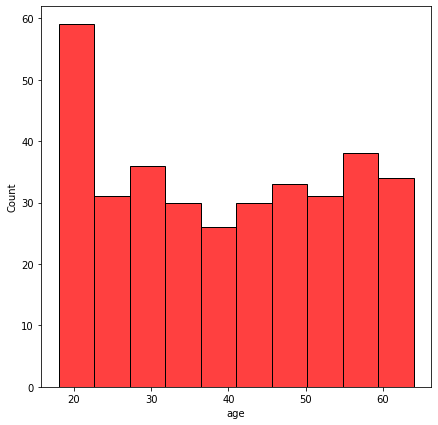

In [10]:
plt.figure(figsize=(7,7))
sns.histplot(data=Data, x = "age", color ="red")

### Age group of 20-30 have got the highest charges

<AxesSubplot:xlabel='smoker', ylabel='count'>

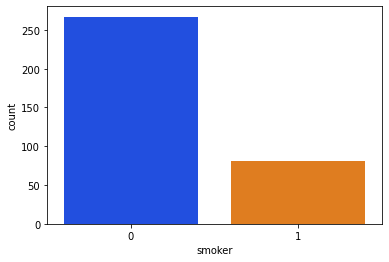

In [11]:
sns.countplot(data=Data , x = "smoker", palette = "bright")

### Number of non-smokers are significanty less than  smokers

<AxesSubplot:xlabel='bmi', ylabel='Density'>

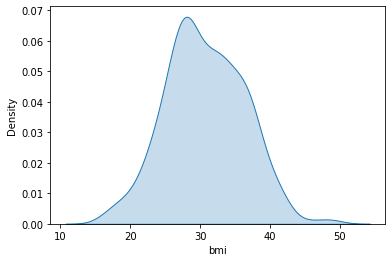

In [12]:
sns.kdeplot(data= Data, x ="bmi", shade= True)

In [13]:
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [14]:
 X = Data.drop("charges",axis=1).values
 y = Data["charges"].values

### Dropping target feature from the dataset and saving it in target variable

In [15]:
A = ["bmi","age"]
A

['bmi', 'age']

# Scaling Data

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Data[A] = scaler.fit_transform(Data[A])
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.430366,0,-0.494245,0,1,3,16884.92400
1,-1.499828,1,0.550655,1,0,2,1725.55230
2,-0.805205,1,0.413590,3,0,2,4449.46200
3,-0.457893,1,-1.418991,0,0,1,21984.47061
4,-0.527355,1,-0.319799,0,0,1,3866.85520


# Train-Test Splitting

In [17]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test  = train_test_split(X,y , test_size=0.2 , random_state= 31)

# Training and Evaluating Models

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
model = RandomForestRegressor(n_estimators=170 )
model.fit(X_train , y_train)
y_pred = model.predict(X_test)


rf_r2_score = r2_score(y_test, y_pred)
print('R square Score = ', round(rf_r2_score, 3))
gb_mse = mean_squared_error(y_test, y_pred)
gb_rmse = np.sqrt(gb_mse)
print('Root Mean Squared Error = ', round(gb_rmse, 3))


R square Score =  0.9
Root Mean Squared Error =  4447.849


In [19]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

rf_r2_score = r2_score(y_test, lr_pred)
print('R square Score = ', round(rf_r2_score, 3))
gb_mse = mean_squared_error(y_test, lr_pred)
gb_rmse = np.sqrt(gb_mse)
print('Root Mean Squared Error = ', round(gb_rmse, 3))


R square Score =  0.796
Root Mean Squared Error =  6360.737


In [20]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

rf_r2_score = r2_score(y_test, dt_pred)
print('R square Score = ', round(rf_r2_score, 3))
gb_mse = mean_squared_error(y_test, dt_pred)
gb_rmse = np.sqrt(gb_mse)
print('Root Mean Squared Error = ', round(gb_rmse, 3))

R square Score =  0.879
Root Mean Squared Error =  4889.745


### RandomForestRegressor has the highest accuracy of 90%

# Saving Models

In [21]:
from joblib import dump,load
dump(model,"Insurance.joblib")


['Insurance.joblib']

# Testing Models

In [22]:
features = np.array([[1.130366,	1,	-0.694245,	1,	1	,2]])
model.predict(features)

array([17244.58741382])